### Démonstration d'un échantillon d’images pour chaque classe avec les boîtes englobantes

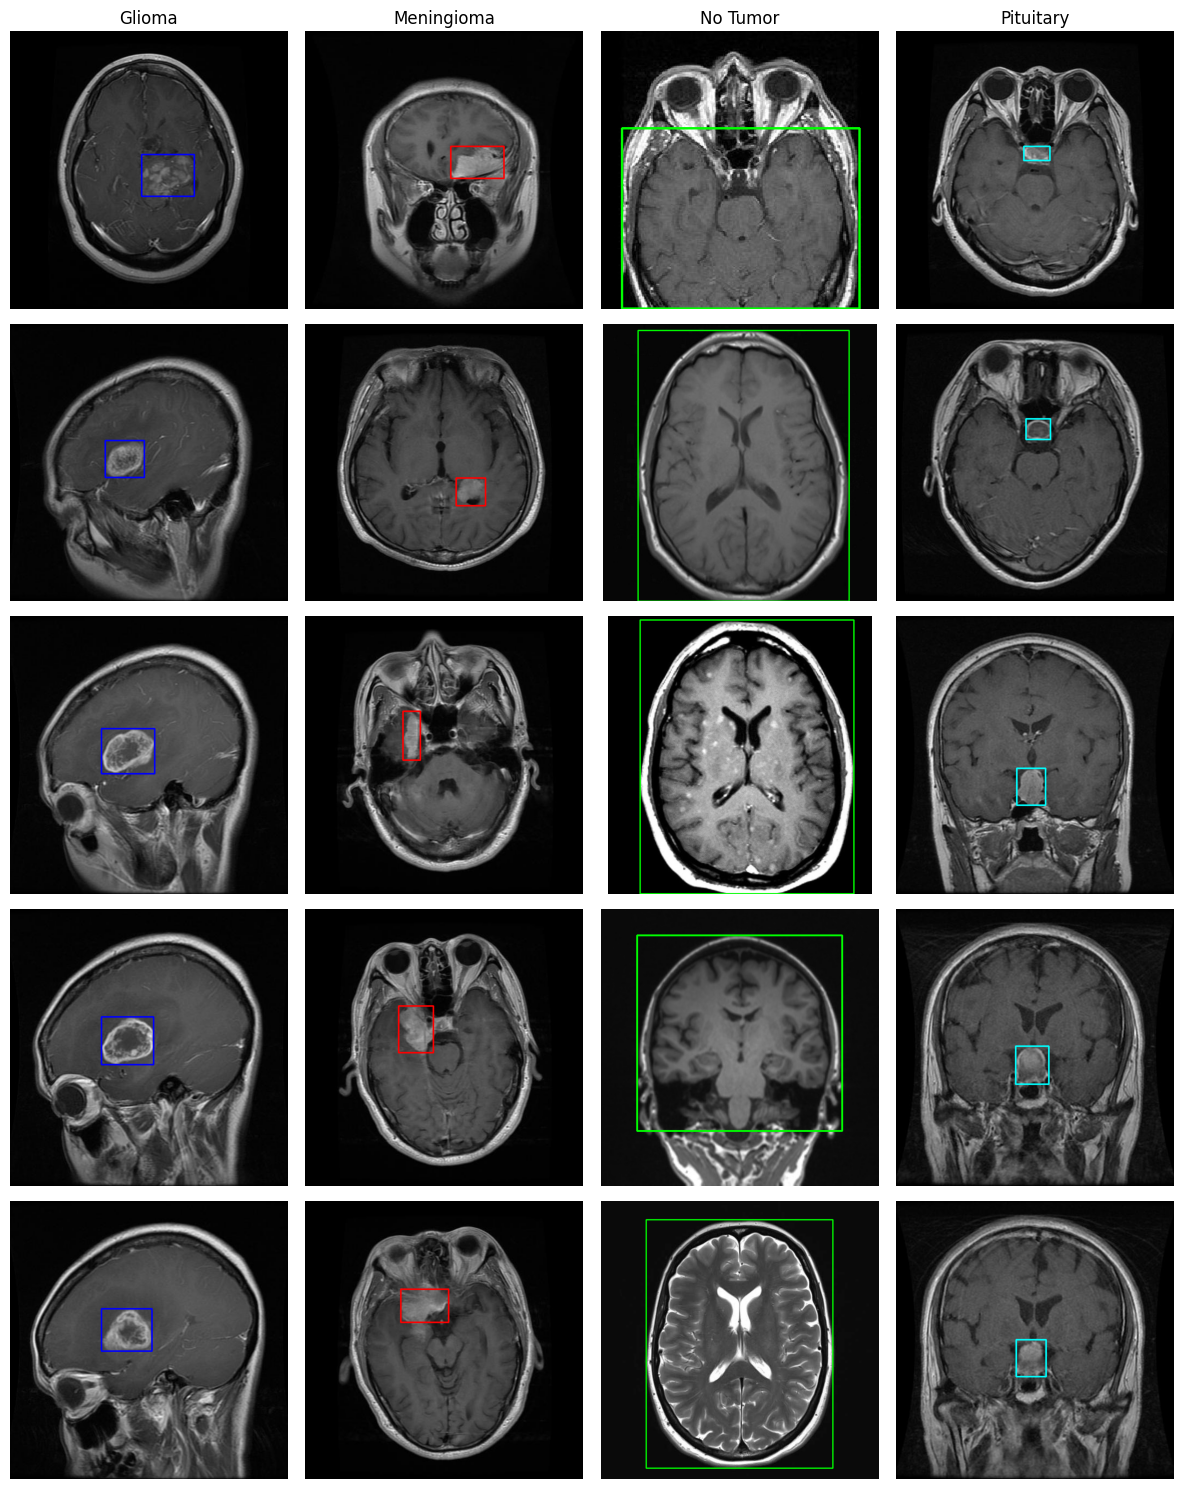

In [10]:
import matplotlib.pyplot as plt
import os
import cv2

classes = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
colors = [(0,0,255), (255,0,0), (0,255,0), (0,255,255)]

fig, axes = plt.subplots(5, len(classes), figsize=(3*len(classes), 15))

for class_idx, class_name in enumerate(classes):
    images_dir = os.path.join('./data/Data_Brain/Train', class_name, 'images')
    labels_dir = os.path.join('./data/Data_Brain/Train', class_name, 'labels')

    label_files = {os.path.splitext(f)[0]: f for f in os.listdir(labels_dir)}
    image_files = [f for f in os.listdir(images_dir)
                   if os.path.splitext(f)[0] in label_files]
    
    for img_idx, image_file in enumerate(image_files[:5]):
        image_name = os.path.splitext(image_file)[0]
        image_path = os.path.join(images_dir, image_file)
        label_path = os.path.join(labels_dir, label_files[image_name])

        img = cv2.imread(image_path)

        with open(label_path, 'r') as f:
            label_content = f.read().strip()

        image_height, image_width = img.shape[:2]

        class_id, x_center, y_center, box_width, box_height = map(float, label_content.split())

        x_center *= image_width

        y_center *= image_height

        box_width *= image_width

        box_height *= image_height

        x_min = int(x_center - box_width/2)
        y_min = int(y_center - box_height/2)
        x_max = int(x_center + box_width/2)
        y_max = int(y_center + box_height/2) 

        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), colors[int(class_id)], 2)

        axes[img_idx, class_idx].imshow(img)
        if img_idx == 0:
            axes[img_idx, class_idx].set_title(class_name)
        axes[img_idx, class_idx].axis('off')

plt.tight_layout()
plt.show()

### Création d'un dossier pour stocker les données après filtrage

In [20]:
os.mkdir('./data/Data_Brain_Filtered')

In [23]:
folders = [
    "images/training",
    "images/validation",
    "images/test",
    "labels/training",
    "labels/validation",
    "labels/test"
]

for folder in folders:
    os.makedirs(os.path.join('./data/Data_Brain_Filtered',folder), exist_ok=True)

In [25]:
import shutil

for x in classes:
    Training_images_folder = os.path.join('./data/Data_Brain/Train/',x,'images')
    Training_labels_folder = os.path.join('./data/Data_Brain/Train/',x,'labels')
    
    Training_label_files = {os.path.splitext(f)[0]: f for f in os.listdir(Training_labels_folder)}
    
    for img_file in os.listdir(Training_images_folder):
        img_base_name = os.path.splitext(img_file)[0]

        if img_base_name in Training_label_files:
            src_img = os.path.join(Training_images_folder, img_file)
            dst_img = os.path.join('./data/Data_Brain_Filtered', 'images', 'training', img_file)
            shutil.copy(src_img, dst_img)

            label_file = Training_label_files[img_base_name]
            src_label = os.path.join(Training_labels_folder, label_file)
            dst_label = os.path.join('./data/Data_Brain_Filtered', 'labels', 'training', label_file)
            shutil.copy(src_label, dst_label)
        else:
            print(f"Avertissement: Pas de label trouver pour {img_file}")
    
    Validation_images_folder = os.path.join('./data/Data_Brain/Val/', x, 'images')
    Validation_labels_folder = os.path.join('./data/Data_Brain/Val/',x,'labels')

    Validation_label_files = {os.path.splitext(f)[0]: f for f in os.listdir(Validation_labels_folder)}

    for img_file in os.listdir(Validation_images_folder):
        img_base_name = os.path.splitext(img_file)[0]

        if img_base_name in Validation_label_files:
            src_img = os.path.join(Validation_images_folder, img_file)
            dst_img = os.path.join('./data/Data_Brain_Filtered', 'images', 'Validation', img_file)
            shutil.copy(src_img,dst_img)     

            label_file = Validation_label_files[img_base_name]
            src_label = os.path.join(Validation_labels_folder, label_file)
            dst_label = os.path.join('./data/Data_Brain_Filtered', 'labels', 'Validation', label_file)
            shutil.copy(src_label, dst_label)
        else:
            print(f"Avertissement: Pas de label trouver pour {img_file}")
     

Avertissement: Pas de label trouver pour image(55).jpg
Avertissement: Pas de label trouver pour image(61).jpg
